In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
aviation_data = pd.read_csv('../datasets/aviation_data.csv')

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [4]:
aviation_data.head()

NtsbNo EventType    Mkey             EventDate                    City  \
0  ERA24LA019       ACC  193301  2023-10-25T09:57:00Z                 Atlanta   
1  CEN24LA020       ACC  193291  2023-10-23T15:11:00Z                  Pierre   
2  CEN24LA023       ACC  193305  2023-10-22T19:00:00Z  Union charter Township   
3  WPR24FA018       ACC  193276  2023-10-20T17:01:00Z                  Covelo   
4  ERA24LA015       ACC  193282  2023-10-20T16:00:00Z          Tellico Plains   

          State        Country ReportNo       N  HasSafetyRec     ReportType  \
0       Georgia  United States      NaN  N7981E         False  DirectorBrief   
1  South Dakota  United States      NaN  N92884         False  DirectorBrief   
2      Michigan  United States      NaN  N8088E         False  DirectorBrief   
3    California  United States      NaN  N8248K         False  DirectorBrief   
4     Tennessee  United States      NaN  N958TW         False  DirectorBrief   

  OriginalPublishDate HighestInjuryLevel  FatalInjuryCount  \
0                 NaN               None                 0   
1                 NaN              Fatal                 1   
2                 NaN               None                 0   
3                 NaN              Fatal                 2   
4                 NaN               None                 0   

   SeriousInjuryCount  MinorInjuryCount ProbableCause  EventID  Latitude  \
0                   0                 0           NaN      NaN       0.0   
1                   1                 0           NaN      NaN       0.0   
2                   0                 0           NaN      NaN       0.0   
3                   0                 0           NaN      NaN       0.0   
4                   0                 0           NaN      NaN       0.0   

   Longitude                Make       Model AirCraftCategory AirportID  \
0        0.0              CESSNA         150              AIR       CCO   
1        0.0               PIPER  PA 46-350P              NaN       NaN   
2        0.0               PIPER  PA-28-201T              NaN       NaN   
3        0.0               BEECH         A36              NaN       NaN   
4        0.0  AVIAT AIRCRAFT INC    A-1C-200              AIR      NONE   

                    AirportName AmateurBuilt NumberOfEngines Scheduled  \
0  Newnan Coweta County Airport        FALSE               1       NaN   
1                           NaN        FALSE             NaN       NaN   
2                           NaN        FALSE             NaN       NaN   
3                           NaN        FALSE             NaN       NaN   
4                           NaN        FALSE               1       NaN   

  PurposeOfFlight  FAR AirCraftDamage WeatherCondition         Operator  \
0            INST  091            NaN              VMC              NaN   
1            PERS  091            NaN              NaN              NaN   
2            PERS  091            NaN              NaN              NaN   
3            PERS  091            NaN              NaN  PLANE HAVEN LLC   
4            PERS  091            NaN              VMC              NaN   

  ReportStatus  RepGenFlag DocketUrl DocketPublishDate  Unnamed: 37  
0      In work       False       NaN               NaN          NaN  
1      In work       False       NaN               NaN          NaN  
2      In work       False       NaN               NaN          NaN  
3      In work       False       NaN               NaN          NaN  
4      In work       False       NaN               NaN          NaN

In [5]:
aviation_data.shape

(89505, 38)

In [6]:
aviation_data.describe()

Mkey  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
count   89505.000000      89505.000000        89505.000000      89505.000000   
mean    52721.064209          0.547355            0.212256          0.338931   
std     33341.346545          4.902895            1.090214          2.307135   
min      2292.000000          0.000000            0.000000          0.000000   
25%     25031.000000          0.000000            0.000000          0.000000   
50%     50203.000000          0.000000            0.000000          0.000000   
75%     75937.000000          0.000000            0.000000          0.000000   
max    193305.000000        349.000000          111.000000        380.000000   

       EventID      Latitude     Longitude  Unnamed: 37  
count      0.0  8.950500e+04  8.950500e+04          0.0  
mean       NaN  1.285408e+03 -7.657945e+01          NaN  
std        NaN  2.182867e+05  8.431713e+03          NaN  
min        NaN -7.801694e+01 -1.004241e+06          NaN  
25%        NaN  2.986805e+01 -1.119175e+02          NaN  
50%        NaN  3.622666e+01 -9.064059e+01          NaN  
75%        NaN  4.159992e+01 -7.785972e+01          NaN  
max        NaN  4.351118e+07  7.457204e+05          NaN

In [7]:
aviation_data.select_dtypes(exclude = np.number).describe()

NtsbNo EventType             EventDate       City       State  \
count        89505     89505                 89505      89444       82309   
unique       89505         3                 87383      22486          57   
top     ERA24LA019       ACC  1987-12-10T10:30:00Z  ANCHORAGE  California   
freq             1     85540                     4        361        8795   

              Country ReportNo      N HasSafetyRec     ReportType  \
count           89008      216  89410        89505          89503   
unique            189      214  81075            2              4   
top     United States  AAR8903  UNREG        False  DirectorBrief   
freq            82429        2    521        88843          82690   

         OriginalPublishDate HighestInjuryLevel  \
count                  70460              88974   
unique                  2187                  4   
top     2020-11-03T05:00:00Z               None   
freq                    1046              48268   

                                           ProbableCause    Make  Model  \
count                                              60385   89443  89416   
unique                                             56804    9173  13511   
top     A loss of engine power for undetermined reasons.  CESSNA    152   
freq                                                 124   18498   2273   

       AirCraftCategory AirportID AirportName AmateurBuilt NumberOfEngines  \
count             88864     50547       53089        89505           83447   
unique               40     10534       25342            7              39   
top                 AIR      NONE     Private        FALSE               1   
freq              76092      1489         249        79934           69233   

       Scheduled PurposeOfFlight    FAR AirCraftDamage WeatherCondition  \
count      12739           83133  88822          88926            84688   
unique         3             130     81             30                3   
top         NSCH            PERS    091    Substantial              VMC   
freq        4645           49217  70270          64154            77626   

       Operator ReportStatus RepGenFlag  \
count     43740        83034      89505   
unique    37702            2          1   
top           ,    Completed      False   
freq        480        81839      89505   

                                            DocketUrl     DocketPublishDate  
count                                           22081                 22081  
unique                                          22081                 19012  
top     https://data.ntsb.gov/Docket?ProjectID=193042  10/9/2020 5:40:27 PM  
freq                                                1                    44

In [8]:
aviation_data2 = aviation_data.copy()

In [9]:
intial_X = aviation_data2.dropna(subset=['ProbableCause'])

In [10]:
aviation_data2.head()

NtsbNo EventType    Mkey             EventDate                    City  \
0  ERA24LA019       ACC  193301  2023-10-25T09:57:00Z                 Atlanta   
1  CEN24LA020       ACC  193291  2023-10-23T15:11:00Z                  Pierre   
2  CEN24LA023       ACC  193305  2023-10-22T19:00:00Z  Union charter Township   
3  WPR24FA018       ACC  193276  2023-10-20T17:01:00Z                  Covelo   
4  ERA24LA015       ACC  193282  2023-10-20T16:00:00Z          Tellico Plains   

          State        Country ReportNo       N  HasSafetyRec     ReportType  \
0       Georgia  United States      NaN  N7981E         False  DirectorBrief   
1  South Dakota  United States      NaN  N92884         False  DirectorBrief   
2      Michigan  United States      NaN  N8088E         False  DirectorBrief   
3    California  United States      NaN  N8248K         False  DirectorBrief   
4     Tennessee  United States      NaN  N958TW         False  DirectorBrief   

  OriginalPublishDate HighestInjuryLevel  FatalInjuryCount  \
0                 NaN               None                 0   
1                 NaN              Fatal                 1   
2                 NaN               None                 0   
3                 NaN              Fatal                 2   
4                 NaN               None                 0   

   SeriousInjuryCount  MinorInjuryCount ProbableCause  EventID  Latitude  \
0                   0                 0           NaN      NaN       0.0   
1                   1                 0           NaN      NaN       0.0   
2                   0                 0           NaN      NaN       0.0   
3                   0                 0           NaN      NaN       0.0   
4                   0                 0           NaN      NaN       0.0   

   Longitude                Make       Model AirCraftCategory AirportID  \
0        0.0              CESSNA         150              AIR       CCO   
1        0.0               PIPER  PA 46-350P              NaN       NaN   
2        0.0               PIPER  PA-28-201T              NaN       NaN   
3        0.0               BEECH         A36              NaN       NaN   
4        0.0  AVIAT AIRCRAFT INC    A-1C-200              AIR      NONE   

                    AirportName AmateurBuilt NumberOfEngines Scheduled  \
0  Newnan Coweta County Airport        FALSE               1       NaN   
1                           NaN        FALSE             NaN       NaN   
2                           NaN        FALSE             NaN       NaN   
3                           NaN        FALSE             NaN       NaN   
4                           NaN        FALSE               1       NaN   

  PurposeOfFlight  FAR AirCraftDamage WeatherCondition         Operator  \
0            INST  091            NaN              VMC              NaN   
1            PERS  091            NaN              NaN              NaN   
2            PERS  091            NaN              NaN              NaN   
3            PERS  091            NaN              NaN  PLANE HAVEN LLC   
4            PERS  091            NaN              VMC              NaN   

  ReportStatus  RepGenFlag DocketUrl DocketPublishDate  Unnamed: 37  
0      In work       False       NaN               NaN          NaN  
1      In work       False       NaN               NaN          NaN  
2      In work       False       NaN               NaN          NaN  
3      In work       False       NaN               NaN          NaN  
4      In work       False       NaN               NaN          NaN

In [11]:
[intial_X[column].fillna(intial_X[column].mode()[0], inplace=True) for column in intial_X.select_dtypes(include=['object']).columns]


C:\Users\muham\AppData\Local\Temp\ipykernel_2000\586621082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [intial_X[column].fillna(intial_X[column].mode()[0], inplace=True) for column in intial_X.select_dtypes(include=['object']).columns]
C:\Users\muham\AppData\Local\Temp\ipykernel_2000\586621082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [intial_X[column].fillna(intial_X[column].mode()[0], inplace=True) for column in intial_X.select_dtypes(include=['object']).columns]
C:\Users\muham\AppData\Local\Temp\ipykernel_2000\586621082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
[intial_X[column].fillna(intial_X[column].mean(), inplace=True) for column in intial_X.select_dtypes(include=['float64', 'int64']).columns]


C:\Users\muham\AppData\Local\Temp\ipykernel_2000\1523205305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [intial_X[column].fillna(intial_X[column].mean(), inplace=True) for column in intial_X.select_dtypes(include=['float64', 'int64']).columns]


[None, None, None, None, None, None, None, None]

In [25]:
aviation_data2.head()

NtsbNo EventType    Mkey             EventDate                    City  \
0  ERA24LA019       ACC  193301  2023-10-25T09:57:00Z                 Atlanta   
1  CEN24LA020       ACC  193291  2023-10-23T15:11:00Z                  Pierre   
2  CEN24LA023       ACC  193305  2023-10-22T19:00:00Z  Union charter Township   
3  WPR24FA018       ACC  193276  2023-10-20T17:01:00Z                  Covelo   
4  ERA24LA015       ACC  193282  2023-10-20T16:00:00Z          Tellico Plains   

          State        Country ReportNo       N  HasSafetyRec     ReportType  \
0       Georgia  United States      NaN  N7981E         False  DirectorBrief   
1  South Dakota  United States      NaN  N92884         False  DirectorBrief   
2      Michigan  United States      NaN  N8088E         False  DirectorBrief   
3    California  United States      NaN  N8248K         False  DirectorBrief   
4     Tennessee  United States      NaN  N958TW         False  DirectorBrief   

  OriginalPublishDate HighestInjuryLevel  FatalInjuryCount  \
0                 NaN               None                 0   
1                 NaN              Fatal                 1   
2                 NaN               None                 0   
3                 NaN              Fatal                 2   
4                 NaN               None                 0   

   SeriousInjuryCount  MinorInjuryCount ProbableCause  EventID  Latitude  \
0                   0                 0           NaN      NaN       0.0   
1                   1                 0           NaN      NaN       0.0   
2                   0                 0           NaN      NaN       0.0   
3                   0                 0           NaN      NaN       0.0   
4                   0                 0           NaN      NaN       0.0   

   Longitude                Make       Model AirCraftCategory AirportID  \
0        0.0              CESSNA         150              AIR       CCO   
1        0.0               PIPER  PA 46-350P              NaN       NaN   
2        0.0               PIPER  PA-28-201T              NaN       NaN   
3        0.0               BEECH         A36              NaN       NaN   
4        0.0  AVIAT AIRCRAFT INC    A-1C-200              AIR      NONE   

                    AirportName AmateurBuilt NumberOfEngines Scheduled  \
0  Newnan Coweta County Airport        FALSE               1       NaN   
1                           NaN        FALSE             NaN       NaN   
2                           NaN        FALSE             NaN       NaN   
3                           NaN        FALSE             NaN       NaN   
4                           NaN        FALSE               1       NaN   

  PurposeOfFlight  FAR AirCraftDamage WeatherCondition         Operator  \
0            INST  091            NaN              VMC              NaN   
1            PERS  091            NaN              NaN              NaN   
2            PERS  091            NaN              NaN              NaN   
3            PERS  091            NaN              NaN  PLANE HAVEN LLC   
4            PERS  091            NaN              VMC              NaN   

  ReportStatus  RepGenFlag DocketUrl DocketPublishDate  Unnamed: 37  
0      In work       False       NaN               NaN          NaN  
1      In work       False       NaN               NaN          NaN  
2      In work       False       NaN               NaN          NaN  
3      In work       False       NaN               NaN          NaN  
4      In work       False       NaN               NaN          NaN

In [13]:
aviation_data_encoded = pd.get_dummies(intial_X, columns=['WeatherCondition', 'Make', 'Model', 'AirCraftCategory', 
                                                                      'NumberOfEngines', 'PurposeOfFlight', 'AirCraftDamage', 
                                                                      'HighestInjuryLevel'])


In [14]:
#Unnecessary Columns
columns_to_drop = ['NtsbNo', 'Mkey', 'ReportNo', 'EventID', 'City', 'State', 'Country', 'ReportType', 
                   'OriginalPublishDate', 'AirportID', 'AirportName', 'FAR', 'Operator', 'ReportStatus', 
                   'DocketUrl', 'DocketPublishDate', 'Unnamed: 37', 'N', 'EventType', 'EventDate', 'HasSafetyRec', 
                   'RepGenFlag']

In [15]:
aviation_data_encoded = aviation_data_encoded.drop(columns=columns_to_drop)


In [16]:
aviation_data_encoded.head()

FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
142                 0                   1                 0   
149                 0                   1                 0   
170                 0                   0                 2   
174                 0                   0                 0   
202                 0                   0                 0   

                                                                                                                                                                                                                                                                                                                                                                                 ProbableCause  \
142                                                                                                                                                                            The pilot’s improper fuel planning, that resulted in a total loss of engine power due to fuel exhaustion, and a subsequent forced landing. Also causal was the pilot’s decision to go around with minimum fuel.   
149                                                                                                                                                                                                                                                                                                        An inadvertent encounter with convectively induced turbulence (CIT) during descent.   
170                                                                                                                                                                                                                                                                                                                           An in-flight collision with multiple geese during initial climb.   
174                                                                                                                                                                                                                                                                              The pilot’s inadequate fuel management which resulted in a total loss of engine power due to fuel starvation.   
202  The ground crew’s failure to secure the backpack at the landing zone (LZ), that resulted in the tail rotor impacting the backpack during the landing. Contributing to the accident was the pilot’s inadequate selection of an area at the LZ, the lack of awareness of the backpack at the LZ, and the absence of communication between the pilot and the ground crew during the landing.   

      Latitude   Longitude AmateurBuilt Scheduled  WeatherCondition_IMC  \
142  42.038956  -88.006186        FALSE      NSCH                     0   
149  38.750900  -85.267600        FALSE      SCHD                     0   
170  39.539747 -104.851350        FALSE      NSCH                     0   
174  44.491106  -89.508390        FALSE      NSCH                     0   
202   0.000000    0.000000        FALSE      NSCH                     0   

     WeatherCondition_Unknown  WeatherCondition_VMC  Make_,   Make_1200  \
142                         0                     1        0          0   
149                         0                     1        0          0   
170                         0                     1        0          0   
174                         0                     1        0          0   
202                         0                     1        0          0   

     Make_177MF LLC  Make_1977 COLFER-CHAN  Make_1ST FTR GP  Make_2000 McCoy  \
142               0                      0                0                0   
149               0                      0                0                0   
170               0                      0                0                0   
174               0                      0                0                0   
202    

Lets see Top 10 Causes.

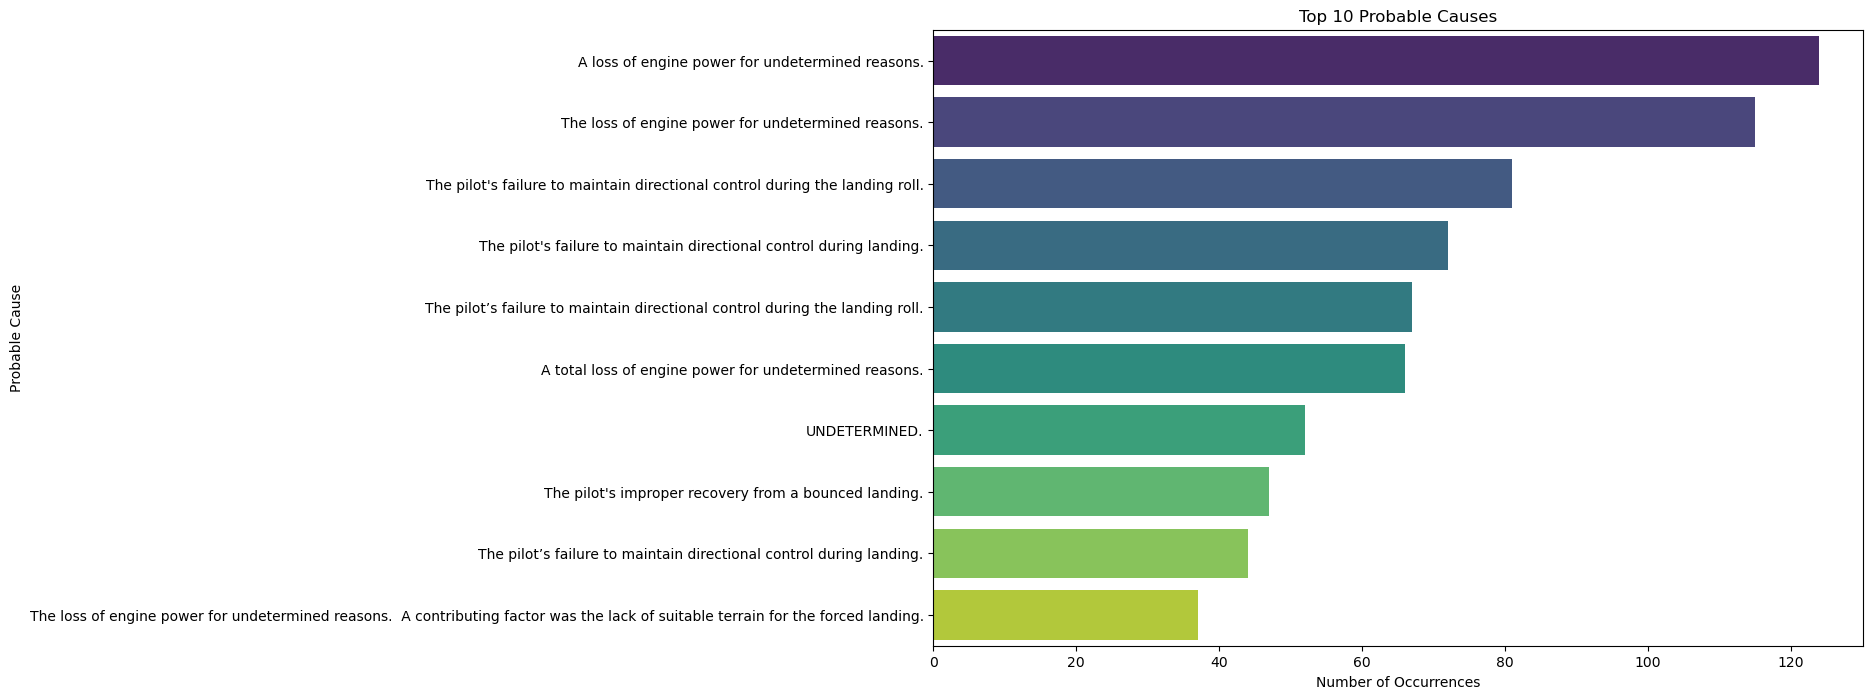

In [17]:
top_causes = aviation_data_encoded['ProbableCause'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()


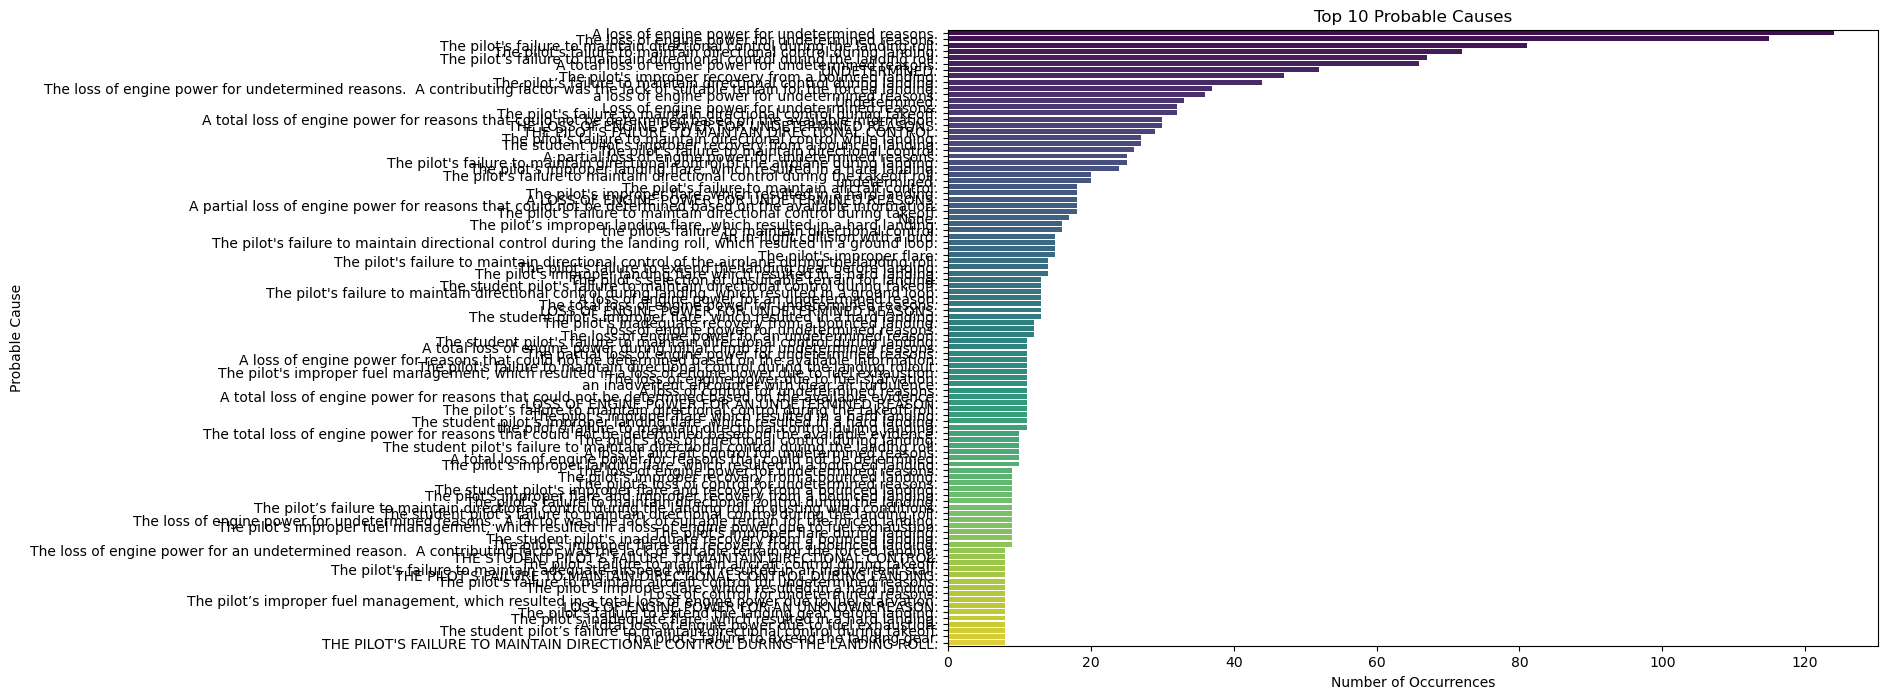

In [21]:
top_causes = aviation_data_encoded['ProbableCause'].value_counts().head(100)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()

In [23]:

aviation_data_encoded['ProbableCause'] = aviation_data_encoded['ProbableCause'].apply(
    lambda x: 'Engine-related' if 'engine' in x.lower() else x)

top_causes_updated = aviation_data_encoded['ProbableCause'].value_counts().head(10)
top_causes_updated


Engine-related                                                                  12708
The pilot's failure to maintain directional control during the landing roll.       81
The pilot's failure to maintain directional control during landing.                72
The pilot’s failure to maintain directional control during the landing roll.       67
UNDETERMINED.                                                                      52
The pilot's improper recovery from a bounced landing.                              47
The pilot’s failure to maintain directional control during landing.                44
Undetermined.                                                                      33
The pilot's failure to maintain directional control during takeoff.                32
THE PILOT'S FAILURE TO MAINTAIN DIRECTIONAL CONTROL.                               29
Name: ProbableCause, dtype: int64

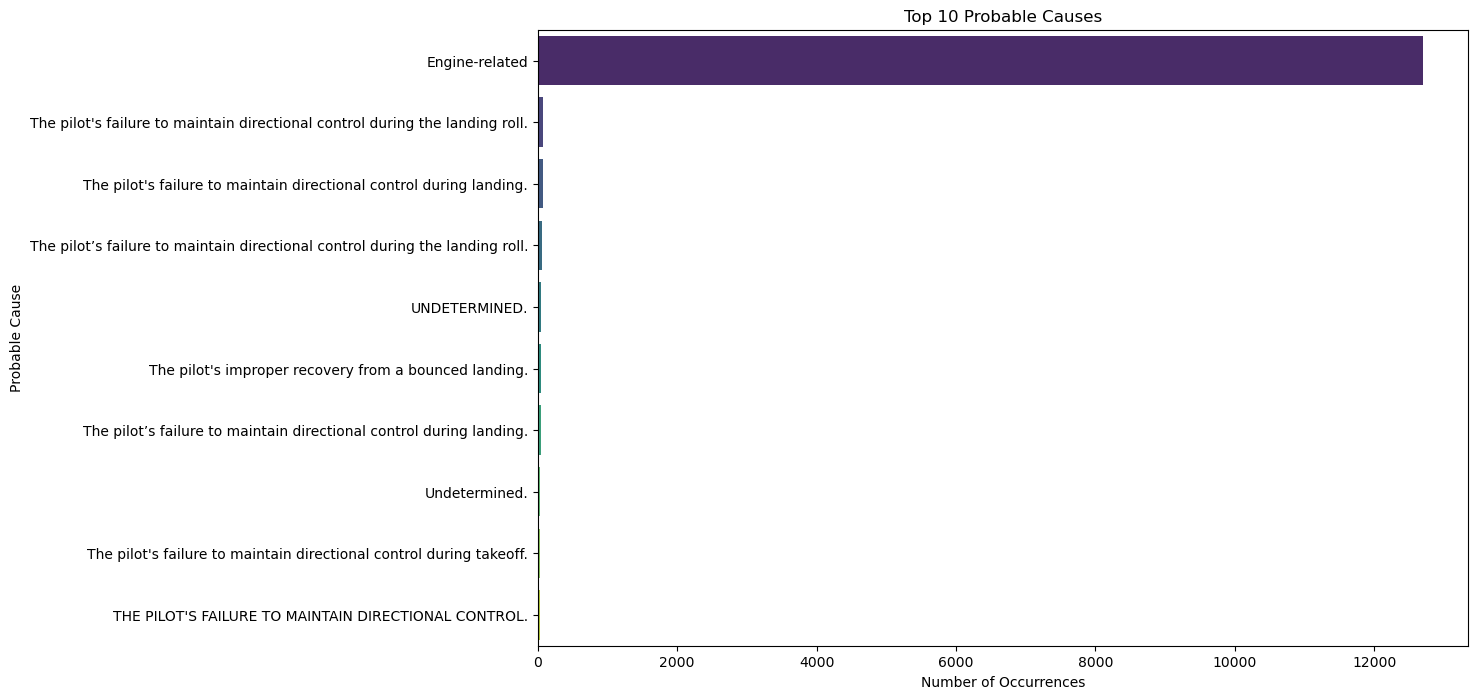

In [24]:
top_causes = aviation_data_encoded['ProbableCause'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()
